<a href="https://colab.research.google.com/github/Naushad13b/Forecasting/blob/main/007E)_prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#https://github.com/dolcikey/TimeSeriesForecasting_BeijingAirQuality/blob/master/003_Modeling.ipynb
#not complited
# Importing required libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [86]:
#Reading the data
df_city = pd.read_csv(r'/content/YJ_Mean_Date_PM2.csv')

In [87]:
print(df_city.info())
df_city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   PM2.5   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,Date,PM2.5
0,01-01-2021,1.575013
1,02-01-2021,1.127264
2,03-01-2021,0.042478
3,04-01-2021,-0.261624
4,05-01-2021,0.116524


In [88]:
from fbprophet import Prophet 

In [89]:
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city.columns = ['Date', 'PM2.5']
df_city.columns = ['ds', 'y']

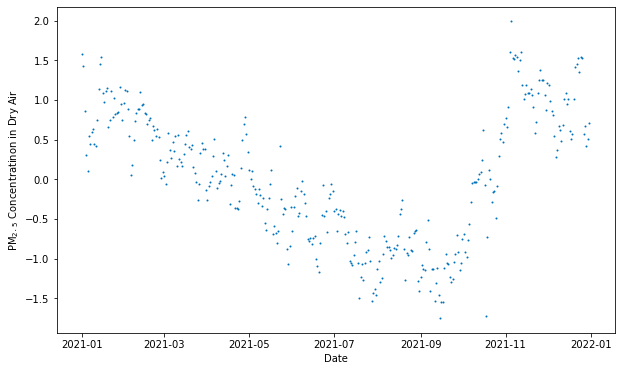

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df_city['ds']), df_city['y'], s=1, c='#0072B9')
plt.xlabel('Date')
plt.ylabel('PM$_2._5$ Concentratinon in Dry Air')
plt.show()

In [91]:
model = Prophet()
model.fit(df_city)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
future = model.make_future_dataframe(periods=365 * 1)
forecast = model.predict(future)

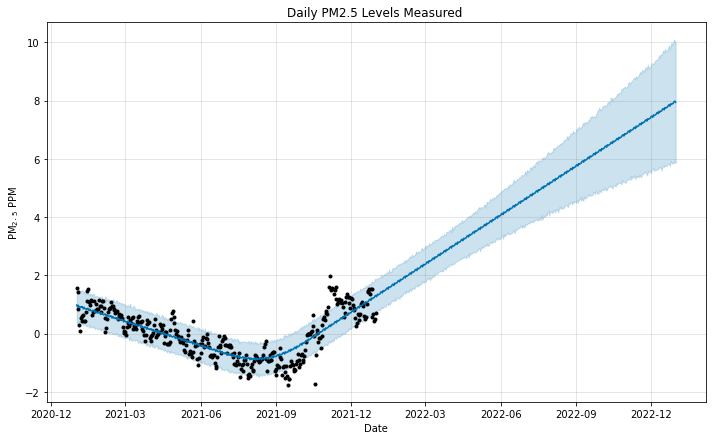

In [93]:
fig = model.plot(forecast, xlabel='Date', ylabel=r'PM$_2._5$ PPM')
plt.title('Daily PM2.5 Levels Measured ')
plt.show()

In [94]:
forecast.head(3).T

,0,1,2
ds,2021-01-01 00:00:00,2021-01-02 00:00:00,2021-01-03 00:00:00
trend,0.960236,0.951171,0.942106
yhat_lower,0.413302,0.320451,0.438658
yhat_upper,1.550612,1.48772,1.505386
trend_lower,0.960236,0.951171,0.942106
trend_upper,0.960236,0.951171,0.942106
additive_terms,0.025341,-0.03796,0.028677
additive_terms_lower,0.025341,-0.03796,0.028677
additive_terms_upper,0.025341,-0.03796,0.028677
weekly,0.025341,-0.03796,0.028677


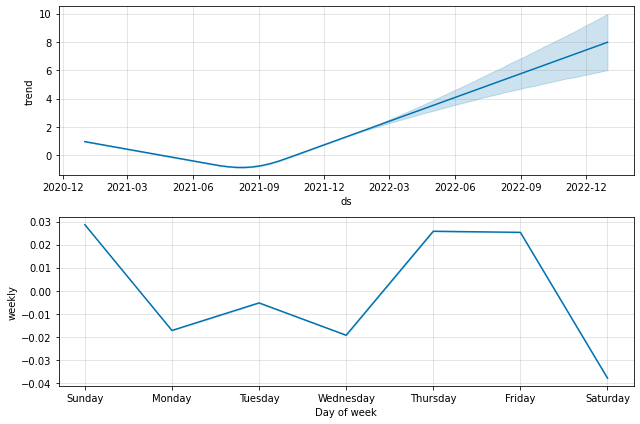

In [95]:
fig2 = model.plot_components(forecast)
plt.show()

In [96]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,0.960236,0.413302,1.550612,0.960236,0.960236,0.025341,0.025341,0.025341,0.025341,0.025341,0.025341,0.0,0.0,0.0,0.985577
1,2021-01-02,0.951171,0.320451,1.487720,0.951171,0.951171,-0.037960,-0.037960,-0.037960,-0.037960,-0.037960,-0.037960,0.0,0.0,0.0,0.913211
2,2021-01-03,0.942106,0.438658,1.505386,0.942106,0.942106,0.028677,0.028677,0.028677,0.028677,0.028677,0.028677,0.0,0.0,0.0,0.970783
3,2021-01-04,0.933042,0.339829,1.478722,0.933042,0.933042,-0.017260,-0.017260,-0.017260,-0.017260,-0.017260,-0.017260,0.0,0.0,0.0,0.915782
4,2021-01-05,0.923977,0.415361,1.460945,0.923977,0.923977,-0.005296,-0.005296,-0.005296,-0.005296,-0.005296,-0.005296,0.0,0.0,0.0,0.918681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2022-12-27,7.903482,5.873851,9.910011,5.972858,9.868960,-0.005296,-0.005296,-0.005296,-0.005296,-0.005296,-0.005296,0.0,0.0,0.0,7.898186
726,2022-12-28,7.921808,5.842326,9.996013,5.980458,9.897266,-0.019328,-0.019328,-0.019328,-0.019328,-0.019328,-0.019328,0.0,0.0,0.0,7.902481
727,2022-12-29,7.940135,5.878649,10.094947,5.988087,9.924033,0.025826,0.025826,0.025826,0.025826,0.025826,0.025826,0.0,0.0,0.0,7.965961
728,2022-12-30,7.958461,5.922698,10.041438,5.996008,9.946856,0.025341,0.025341,0.025341,0.025341,0.025341,0.025341,0.0,0.0,0.0,7.983802


In [97]:
m = Prophet()
m.fit(df_city)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05


In [99]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,0.985577,0.413433,1.532681
1,2021-01-02,0.913211,0.315037,1.436452
2,2021-01-03,0.970783,0.422043,1.577456
3,2021-01-04,0.915782,0.356294,1.442959
4,2021-01-05,0.918681,0.353317,1.452679


In [100]:
df_merge = pd.merge(df_city, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat','y','yhat_lower','yhat_upper']]
df_merge.tail()

,ds,yhat,y,yhat_lower,yhat_upper
360,2021-12-27,1.197118,0.568008,0.640956,1.760641
361,2021-12-28,1.227408,0.672111,0.701802,1.769209
362,2021-12-29,1.231703,0.424150,0.682411,1.805239
363,2021-12-30,1.295183,0.502374,0.705763,1.891664
364,2021-12-31,1.313024,0.707557,0.762212,1.900955


In [101]:
n_test = 61
train_data = forecast.iloc[:len(df_merge) - n_test]
test_data = forecast.iloc[len(df_merge) - n_test:]

In [102]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [103]:
compare = pd.DataFrame(columns=['y','yhat'])
compare['y'] = df_merge['y']
compare['yhat'] = df_merge['yhat']
compare.head()

,y,yhat
0,1.575013,0.985577
1,1.127264,0.661969
2,0.042478,0.408156
3,-0.261624,0.170234
4,0.116524,-0.165495


In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"prophet MAE : {mean_absolute_error(compare['y'],compare['yhat'])}")
print(f"prophet MSE : {mean_squared_error(compare['y'],compare['yhat'])}")

prophet MAE : 0.33576747816419605
prophet MSE : 0.18682985814082337


In [105]:
rmse = np.mean((compare['yhat']- compare['y'])**2)**.5  # RMSE
print('RMSE')
print(rmse)
mpe = np.mean((compare['yhat']- compare['y'])/compare['y'])   # MPE
print('MPE')
print(mpe)
me = np.mean(compare['yhat']- compare['y'])
print('ME')
print(me)
mape = np.mean(np.abs(compare['yhat']- compare['y'])/np.abs(compare['y']))
print('MAPE')
print(mape)

RMSE
0.43223819606881503
MPE
-0.3421067831894291
ME
-0.0008294033199250277
MAPE
1.3366261583049233
